In [1]:
import lec
import xarray
import numpy as np

vmecOutput = "./../testField/wout_DIII-D.nc" 
surf = lec.Surface.readVMECOutput(vmecOutput)
iota = float(xarray.open_dataset(vmecOutput)["iotas"].values[-1])

In [2]:
eqDIIID = lec.SurfaceEquilibrium(surf=surf, iota=iota)

In [3]:
Jacobian = eqDIIID.getJacobian()

In [4]:
ntheta, nzeta = 360, 360
thetaArr = np.linspace(0, 2*np.pi, ntheta) 
zetaArr = np.linspace(0, 2*np.pi, nzeta) 
thetaGrid, zetaGrid = np.meshgrid(thetaArr, zetaArr) 
valueGrid = Jacobian.getValue(thetaGrid, zetaGrid) 

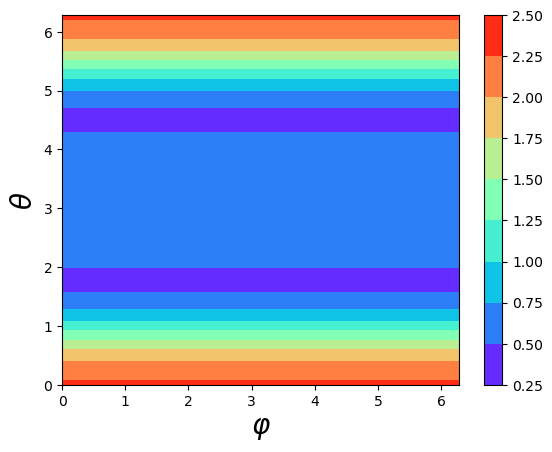

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots()
Jacobian.plot_plt(ax=ax, fig=fig)